In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import scipy.stats as stats

In [2]:
df=pd.read_csv("Loans.csv",index_col="client_id")
df.head()


,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


In [4]:
df.shape

(443, 7)

In [5]:
df.dtypes

loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

In [6]:
#converting datatypes
#loan_id to object
#repaid to categorical
#loan_start and loan_end to date 

In [7]:
#load_id
df["loan_id"]=df["loan_id"].astype("object")
#repaid
df["repaid"]=df["repaid"].astype("category")

df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [8]:
#loan_start
df["loan_start"]=pd.to_datetime(df["loan_start"],format="%Y-%m-%d")
#loan_end
df["loan_end"]=pd.to_datetime(df["loan_end"],format="%Y-%m-%d")

df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [9]:
df["formated_date"]=df["loan_start"].dt.strftime("%d-%m-%Y")
df.head()


,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,formated_date
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,16-04-2002
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,21-10-2003
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,01-02-2006
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,08-12-2010
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,07-07-2010


In [10]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,formated_date
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,16-04-2002
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,21-10-2003
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,01-02-2006
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,08-12-2010
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,07-07-2010


In [11]:
df.dtypes

loan_type                object
loan_amount               int64
repaid                 category
loan_id                  object
loan_start       datetime64[ns]
loan_end         datetime64[ns]
rate                    float64
formated_date            object
dtype: object

In [12]:
#numerical cols
df.describe()

,loan_amount,loan_start,loan_end,rate
count,443.000000,443,443,443.000000
mean,7982.311512,2007-08-02 12:56:53.092550912,2009-08-23 11:35:37.246049536,3.217156
min,559.000000,2000-01-26 00:00:00,2001-08-02 00:00:00,0.010000
25%,4232.500000,2003-10-19 00:00:00,2005-09-12 12:00:00,1.220000
50%,8320.000000,2007-03-10 00:00:00,2009-03-19 00:00:00,2.780000
75%,11739.000000,2011-07-31 00:00:00,2013-09-11 12:00:00,4.750000
max,14971.000000,2014-11-11 00:00:00,2017-05-07 00:00:00,12.620000
std,4172.891992,NaN,NaN,2.397168


In [13]:
df.describe(exclude=[np.number])

,loan_type,repaid,loan_id,loan_start,loan_end,formated_date
count,443,443.0,443.0,443,443,443
unique,4,2.0,443.0,NaN,NaN,430
top,home,1.0,10243.0,NaN,NaN,16-05-2007
freq,121,237.0,1.0,NaN,NaN,2
mean,NaN,NaN,NaN,2007-08-02 12:56:53.092550912,2009-08-23 11:35:37.246049536,NaN
min,NaN,NaN,NaN,2000-01-26 00:00:00,2001-08-02 00:00:00,NaN
25%,NaN,NaN,NaN,2003-10-19 00:00:00,2005-09-12 12:00:00,NaN
50%,NaN,NaN,NaN,2007-03-10 00:00:00,2009-03-19 00:00:00,NaN
75%,NaN,NaN,NaN,2011-07-31 00:00:00,2013-09-11 12:00:00,NaN
max,NaN,NaN,NaN,2014-11-11 00:00:00,2017-05-07 00:00:00,NaN


In [14]:
#missing values
df.isnull().sum()

loan_type        0
loan_amount      0
repaid           0
loan_id          0
loan_start       0
loan_end         0
rate             0
formated_date    0
dtype: int64

In [15]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,formated_date
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,16-04-2002
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,21-10-2003
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,01-02-2006
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,08-12-2010
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,07-07-2010


<Axes: >

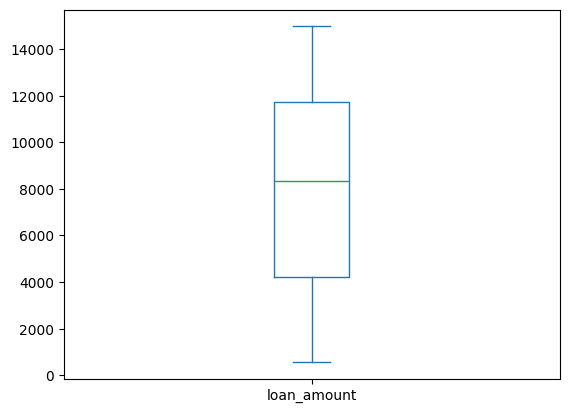

In [16]:
#outliers -Viz (boxplot)

df["loan_amount"].plot(kind="box")

<Axes: >

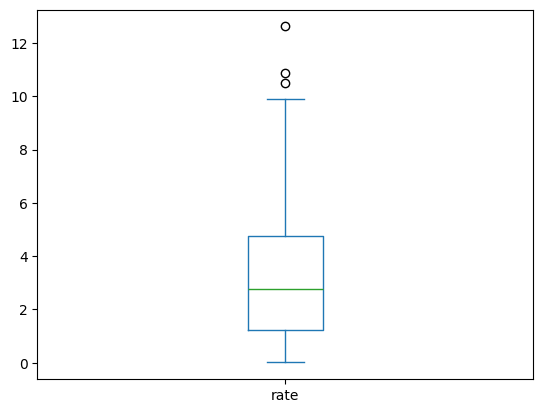

In [17]:
df["rate"].plot(kind="box")

In [18]:
# no outlier in amount but some in rate col, so we will treat outliers
#1)Cap the values
#2)Transform the data

In [19]:
# Transformation:

df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,formated_date
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,16-04-2002
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,21-10-2003
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,01-02-2006
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,08-12-2010
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,07-07-2010


SyntaxError: unterminated string literal (detected at line 1) (2113714275.py, line 1)

In [21]:
df["sq_rt_rate"]=df["rate"]**0.5
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,formated_date,sq_rt_rate
client_id,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,16-04-2002,1.466288
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,21-10-2003,1.118034
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,01-02-2006,0.824621
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,08-12-2010,1.113553
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,07-07-2010,1.769181


In [22]:
df["SQ_RT_rate"]=np.sqrt(df["rate"])
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,formated_date,sq_rt_rate,SQ_RT_rate
client_id,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,16-04-2002,1.466288,1.466288
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,21-10-2003,1.118034,1.118034
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,01-02-2006,0.824621,0.824621
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,08-12-2010,1.113553,1.113553
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,07-07-2010,1.769181,1.769181


In [23]:
#check skewness and kurtosis
print(f"Skewness of original col is {df.rate.skew()}")
print(f"Skewness of transformed col is {df.SQ_RT_rate.skew()}")

print("---"*25)

print(f"Kurtosis of original col is {df.rate.kurt()}")
print(f"Kurtosis of transformed col is {df.SQ_RT_rate.kurt()}")


Skewness of original col is 0.884204614329943
Skewness of transformed col is 0.04964154055528862
---------------------------------------------------------------------------
Kurtosis of original col is 0.4243716514373652
Kurtosis of transformed col is -0.6318437642052039


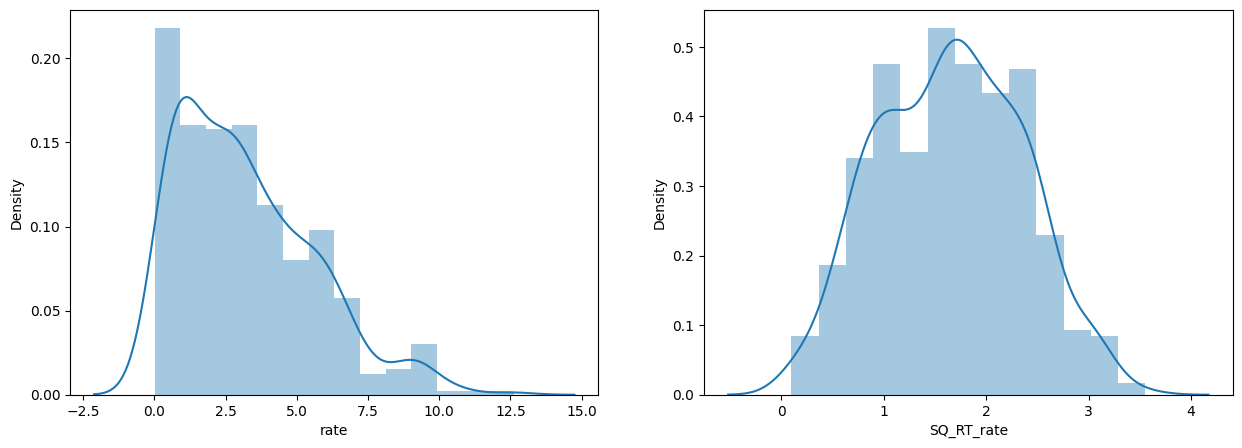

In [24]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(df["rate"],ax=axes[0])
sns.distplot(df["SQ_RT_rate"],ax=axes[1])
plt.show()

In [25]:
# log transformation

In [26]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,formated_date,sq_rt_rate,SQ_RT_rate
client_id,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,16-04-2002,1.466288,1.466288
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,21-10-2003,1.118034,1.118034
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,01-02-2006,0.824621,0.824621
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,08-12-2010,1.113553,1.113553
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,07-07-2010,1.769181,1.769181


In [27]:
df["Log_rate"]=np.log(df["rate"])
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,formated_date,sq_rt_rate,SQ_RT_rate,Log_rate
client_id,,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,16-04-2002,1.466288,1.466288,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,21-10-2003,1.118034,1.118034,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,01-02-2006,0.824621,0.824621,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,08-12-2010,1.113553,1.113553,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,07-07-2010,1.769181,1.769181,1.141033


In [28]:
#check skewness and kurtosis
print(f"Skewness of original col is {df.rate.skew()}")
print(f"Skewness of sqrt transformed col is {df.SQ_RT_rate.skew()}")
print(f"Skewness of log transformed col is {df.Log_rate.skew()}")
print(f"Skewness of log transformed col is {df['Log_rate'].skew()}")

print("---"*25)

print(f"Kurtosis of original col is {df.rate.kurt()}")
print(f"Kurtosis of sqrt transformed col is {df.SQ_RT_rate.kurt()}")
print(f"Kurtosis of log transformed col is {df.Log_rate.kurt()}")


Skewness of original col is 0.884204614329943
Skewness of sqrt transformed col is 0.04964154055528862
Skewness of log transformed col is -1.5943217626331552
Skewness of log transformed col is -1.5943217626331552
---------------------------------------------------------------------------
Kurtosis of original col is 0.4243716514373652
Kurtosis of sqrt transformed col is -0.6318437642052039
Kurtosis of log transformed col is 4.157026150198228


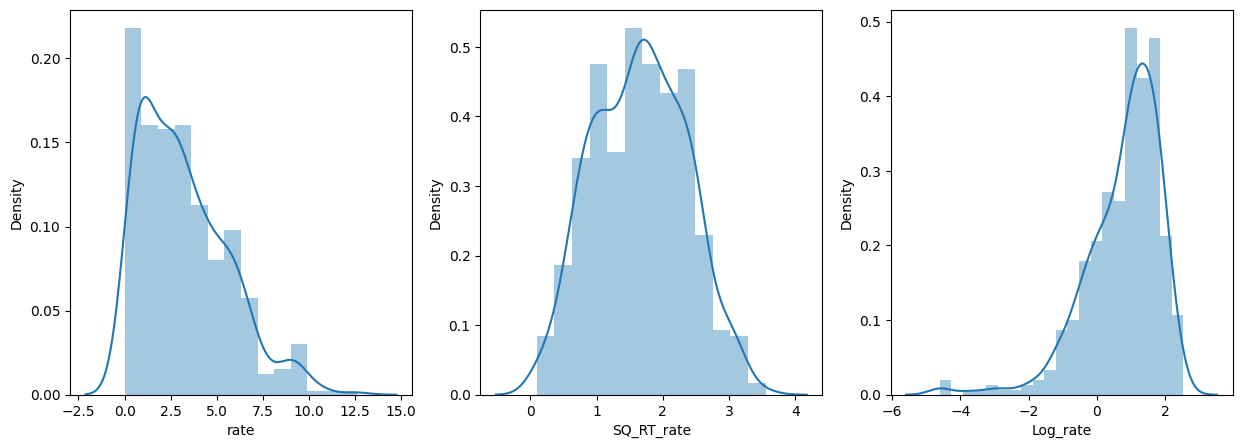

In [29]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.distplot(df["rate"],ax=axes[0])
sns.distplot(df["SQ_RT_rate"],ax=axes[1])
sns.distplot(df["Log_rate"],ax=axes[2])

plt.show()

In [30]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,formated_date,sq_rt_rate,SQ_RT_rate,Log_rate
client_id,,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,16-04-2002,1.466288,1.466288,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,21-10-2003,1.118034,1.118034,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,01-02-2006,0.824621,0.824621,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,08-12-2010,1.113553,1.113553,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,07-07-2010,1.769181,1.769181,1.141033


In [31]:
#remove outlier = Z-score


In [32]:
df["Z_score_values"]=stats.zscore(df["rate"])
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,formated_date,sq_rt_rate,SQ_RT_rate,Log_rate,Z_score_values
client_id,,,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,16-04-2002,1.466288,1.466288,0.765468,-0.445677
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,21-10-2003,1.118034,1.118034,0.223144,-0.821544
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,01-02-2006,0.824621,0.824621,-0.385662,-1.059594
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,08-12-2010,1.113553,1.113553,0.215111,-0.825721
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,07-07-2010,1.769181,1.769181,1.141033,-0.036399


In [33]:
#using lower and upper limit


In [34]:
df[(df["Z_score_values"]<-3 ) | (df["Z_score_values"]>3)]

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,formated_date,sq_rt_rate,SQ_RT_rate,Log_rate,Z_score_values
client_id,,,,,,,,,,,,
41480,credit,2947,1,10302,2005-11-10,2008-03-16,10.49,10-11-2005,3.238827,3.238827,2.350422,3.037362
48177,other,6318,0,10224,2003-02-02,2005-05-08,10.89,02-02-2003,3.300000,3.300000,2.387845,3.204415
49624,home,8133,1,10312,2009-03-14,2011-03-21,12.62,14-03-2009,3.552464,3.552464,2.535283,3.926916


In [35]:
df[(df["Z_score_values"]<-3 ) | (df["Z_score_values"]>3)].shape[0]

3

In [36]:
df2=df[(df["Z_score_values"]>-3 ) & (df["Z_score_values"]<3)].reset_index()
df2.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,formated_date,sq_rt_rate,SQ_RT_rate,Log_rate,Z_score_values
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,16-04-2002,1.466288,1.466288,0.765468,-0.445677
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,21-10-2003,1.118034,1.118034,0.223144,-0.821544
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,01-02-2006,0.824621,0.824621,-0.385662,-1.059594
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,08-12-2010,1.113553,1.113553,0.215111,-0.825721
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,07-07-2010,1.769181,1.769181,1.141033,-0.036399


In [37]:
df2.shape

(440, 13)

In [38]:
df.shape

(443, 12)

In [39]:
#IQR

Q1=df2.rate.quantile(0.25)
Q2=df2.rate.quantile(0.50)
Q3=df2.rate.quantile(0.75)



In [40]:
IQR=Q3-Q1

lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)


In [41]:
lower_limit,upper_limit

(-3.9762499999999994, 9.87375)

In [42]:
df2[(df2["rate"]<lower_limit) | (df2["rate"]>upper_limit)].reset_index()


,index,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,formated_date,sq_rt_rate,SQ_RT_rate,Log_rate,Z_score_values
0,102,39505,cash,11647,1,11928,2003-07-28,2005-12-24,9.91,28-07-2003,3.148015,3.148015,2.293544,2.795137


In [43]:
df3=df2[(df2["rate"]>lower_limit) & (df2["rate"]<upper_limit)]
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,formated_date,sq_rt_rate,SQ_RT_rate,Log_rate,Z_score_values
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,16-04-2002,1.466288,1.466288,0.765468,-0.445677
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,21-10-2003,1.118034,1.118034,0.223144,-0.821544
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,01-02-2006,0.824621,0.824621,-0.385662,-1.059594
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,08-12-2010,1.113553,1.113553,0.215111,-0.825721
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,07-07-2010,1.769181,1.769181,1.141033,-0.036399


In [44]:
df3.shape

(439, 13)

In [45]:
#homework
#try below StandardScalr,Normalization, 
#check the distributiin again(viz),
#categorical encoding (loan_type) try both technoques,
#Split data in train/test
df2.shape

(440, 13)

In [46]:
df2.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,formated_date,sq_rt_rate,SQ_RT_rate,Log_rate,Z_score_values
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,16-04-2002,1.466288,1.466288,0.765468,-0.445677
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,21-10-2003,1.118034,1.118034,0.223144,-0.821544
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,01-02-2006,0.824621,0.824621,-0.385662,-1.059594
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,08-12-2010,1.113553,1.113553,0.215111,-0.825721
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,07-07-2010,1.769181,1.769181,1.141033,-0.036399


In [47]:
#std for rate

df2["std_rate"]=(df2["rate"]-df2["rate"].mean())/df2["rate"].std()
df2.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,formated_date,sq_rt_rate,SQ_RT_rate,Log_rate,Z_score_values,std_rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,16-04-2002,1.466288,1.466288,0.765468,-0.445677,-0.438406
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,21-10-2003,1.118034,1.118034,0.223144,-0.821544,-0.828363
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,01-02-2006,0.824621,0.824621,-0.385662,-1.059594,-1.075336
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,08-12-2010,1.113553,1.113553,0.215111,-0.825721,-0.832696
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,07-07-2010,1.769181,1.769181,1.141033,-0.036399,-0.013786


In [48]:
#std for rate

df2["std_loan_amount"]=(df2["loan_amount"]-df2["loan_amount"].mean())/df2["loan_amount"].std()
df2.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,formated_date,sq_rt_rate,SQ_RT_rate,Log_rate,Z_score_values,std_rate,std_loan_amount
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,16-04-2002,1.466288,1.466288,0.765468,-0.445677,-0.438406,1.357792
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,21-10-2003,1.118034,1.118034,0.223144,-0.821544,-0.828363,0.429916
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,01-02-2006,0.824621,0.824621,-0.385662,-1.059594,-1.075336,1.133360
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,08-12-2010,1.113553,1.113553,0.215111,-0.825721,-0.832696,1.081678
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,07-07-2010,1.769181,1.769181,1.141033,-0.036399,-0.013786,1.447996


In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
df3=df2[["loan_amount","rate"]]
ss=StandardScaler()

In [51]:
scaled_data=ss.fit_transform(df3)
scaled_data

array([[ 1.35933754e+00, -4.38905120e-01],
       [ 4.30404933e-01, -8.29305901e-01],
       [ 1.13464987e+00, -1.07655973e+00],
       [ 1.08290942e+00, -8.33643687e-01],
       [ 1.44964378e+00, -1.38020478e-02],
       [-2.54437337e-01, -5.29998635e-01],
       [-4.36007970e-01,  2.74069235e+00],
       [ 1.11596582e+00,  4.24314384e-01],
       [ 7.34140504e-01,  1.00557777e+00],
       [-9.45507623e-01,  4.76367821e-01],
       [-1.52806670e+00,  1.44369420e+00],
       [ 9.79246704e-02, -1.15463988e+00],
       [ 2.53864621e-01, -9.98479572e-01],
       [-1.07150519e+00,  1.22246709e+00],
       [ 6.84076833e-01, -1.48273428e-01],
       [-1.57663543e-01, -8.11954755e-01],
       [ 9.47569836e-01,  5.99403219e-02],
       [ 4.95799105e-01, -1.81398342e-02],
       [ 9.60984026e-01, -1.02884408e+00],
       [-1.78173860e+00,  4.28652170e-01],
       [ 1.20076266e+00, -5.29998635e-01],
       [-9.93175902e-01, -1.02016850e+00],
       [ 1.01038679e-01, -1.01149293e+00],
       [ 9.

In [52]:
#normalize

df2["norm_rate"]=(df2["rate"]-df2["rate"].min())/(df2["rate"].max()-df2["rate"].min())
df2.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,formated_date,sq_rt_rate,SQ_RT_rate,Log_rate,Z_score_values,std_rate,std_loan_amount,norm_rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,16-04-2002,1.466288,1.466288,0.765468,-0.445677,-0.438406,1.357792,0.216162
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,21-10-2003,1.118034,1.118034,0.223144,-0.821544,-0.828363,0.429916,0.125253
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,01-02-2006,0.824621,0.824621,-0.385662,-1.059594,-1.075336,1.133360,0.067677
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,08-12-2010,1.113553,1.113553,0.215111,-0.825721,-0.832696,1.081678,0.124242
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,07-07-2010,1.769181,1.769181,1.141033,-0.036399,-0.013786,1.447996,0.315152


In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
min_max=MinMaxScaler()
scaled_data_norm=min_max.fit_transform(df3)
scaled_data

array([[ 1.35933754e+00, -4.38905120e-01],
       [ 4.30404933e-01, -8.29305901e-01],
       [ 1.13464987e+00, -1.07655973e+00],
       [ 1.08290942e+00, -8.33643687e-01],
       [ 1.44964378e+00, -1.38020478e-02],
       [-2.54437337e-01, -5.29998635e-01],
       [-4.36007970e-01,  2.74069235e+00],
       [ 1.11596582e+00,  4.24314384e-01],
       [ 7.34140504e-01,  1.00557777e+00],
       [-9.45507623e-01,  4.76367821e-01],
       [-1.52806670e+00,  1.44369420e+00],
       [ 9.79246704e-02, -1.15463988e+00],
       [ 2.53864621e-01, -9.98479572e-01],
       [-1.07150519e+00,  1.22246709e+00],
       [ 6.84076833e-01, -1.48273428e-01],
       [-1.57663543e-01, -8.11954755e-01],
       [ 9.47569836e-01,  5.99403219e-02],
       [ 4.95799105e-01, -1.81398342e-02],
       [ 9.60984026e-01, -1.02884408e+00],
       [-1.78173860e+00,  4.28652170e-01],
       [ 1.20076266e+00, -5.29998635e-01],
       [-9.93175902e-01, -1.02016850e+00],
       [ 1.01038679e-01, -1.01149293e+00],
       [ 9.

In [55]:
#encoding

In [56]:
df2.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,formated_date,sq_rt_rate,SQ_RT_rate,Log_rate,Z_score_values,std_rate,std_loan_amount,norm_rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,16-04-2002,1.466288,1.466288,0.765468,-0.445677,-0.438406,1.357792,0.216162
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,21-10-2003,1.118034,1.118034,0.223144,-0.821544,-0.828363,0.429916,0.125253
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,01-02-2006,0.824621,0.824621,-0.385662,-1.059594,-1.075336,1.133360,0.067677
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,08-12-2010,1.113553,1.113553,0.215111,-0.825721,-0.832696,1.081678,0.124242
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,07-07-2010,1.769181,1.769181,1.141033,-0.036399,-0.013786,1.447996,0.315152


In [57]:
df2["loan_type"].unique()

array(['home', 'credit', 'cash', 'other'], dtype=object)

In [58]:
dummy_data=pd.get_dummies(df2["loan_type"],drop_first=True)
dummy_data.head()

,credit,home,other
0,False,True,False
1,True,False,False
2,False,True,False
3,False,False,False
4,True,False,False


In [59]:
from sklearn.model_selection import train_test_split 

In [60]:
X=df2.drop("loan_amount",axis=1)
y=df2["loan_amount"]


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
X_train.shape

(308, 15)

In [62]:
df2.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,formated_date,sq_rt_rate,SQ_RT_rate,Log_rate,Z_score_values,std_rate,std_loan_amount,norm_rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,16-04-2002,1.466288,1.466288,0.765468,-0.445677,-0.438406,1.357792,0.216162
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,21-10-2003,1.118034,1.118034,0.223144,-0.821544,-0.828363,0.429916,0.125253
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,01-02-2006,0.824621,0.824621,-0.385662,-1.059594,-1.075336,1.133360,0.067677
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,08-12-2010,1.113553,1.113553,0.215111,-0.825721,-0.832696,1.081678,0.124242
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,07-07-2010,1.769181,1.769181,1.141033,-0.036399,-0.013786,1.447996,0.315152


In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   client_id        440 non-null    int64         
 1   loan_type        440 non-null    object        
 2   loan_amount      440 non-null    int64         
 3   repaid           440 non-null    category      
 4   loan_id          440 non-null    object        
 5   loan_start       440 non-null    datetime64[ns]
 6   loan_end         440 non-null    datetime64[ns]
 7   rate             440 non-null    float64       
 8   formated_date    440 non-null    object        
 9   sq_rt_rate       440 non-null    float64       
 10  SQ_RT_rate       440 non-null    float64       
 11  Log_rate         440 non-null    float64       
 12  Z_score_values   440 non-null    float64       
 13  std_rate         440 non-null    float64       
 14  std_loan_amount  440 non-null    float64  

In [64]:
df2["year"]=df2["loan_start"].dt.year
df2["month"]=df2["loan_start"].dt.month
df2["day"]=df2["loan_start"].dt.day
df2["weekday"]=df2["loan_start"].dt.weekday #monday =0

df2.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,formated_date,sq_rt_rate,SQ_RT_rate,Log_rate,Z_score_values,std_rate,std_loan_amount,norm_rate,year,month,day,weekday
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,16-04-2002,1.466288,1.466288,0.765468,-0.445677,-0.438406,1.357792,0.216162,2002,4,16,1
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,21-10-2003,1.118034,1.118034,0.223144,-0.821544,-0.828363,0.429916,0.125253,2003,10,21,1
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,01-02-2006,0.824621,0.824621,-0.385662,-1.059594,-1.075336,1.133360,0.067677,2006,2,1,2
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,08-12-2010,1.113553,1.113553,0.215111,-0.825721,-0.832696,1.081678,0.124242,2010,12,8,2
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,07-07-2010,1.769181,1.769181,1.141033,-0.036399,-0.013786,1.447996,0.315152,2010,7,7,2


In [65]:
df2["time"]=df2["loan_start"].dt.time
# df2["year"]=df2["loan_start"].dt.year
df2.head()


        

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,formated_date,sq_rt_rate,...,Log_rate,Z_score_values,std_rate,std_loan_amount,norm_rate,year,month,day,weekday,time
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,16-04-2002,1.466288,...,0.765468,-0.445677,-0.438406,1.357792,0.216162,2002,4,16,1,00:00:00
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,21-10-2003,1.118034,...,0.223144,-0.821544,-0.828363,0.429916,0.125253,2003,10,21,1,00:00:00
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,01-02-2006,0.824621,...,-0.385662,-1.059594,-1.075336,1.133360,0.067677,2006,2,1,2,00:00:00
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,08-12-2010,1.113553,...,0.215111,-0.825721,-0.832696,1.081678,0.124242,2010,12,8,2,00:00:00
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,07-07-2010,1.769181,...,1.141033,-0.036399,-0.013786,1.447996,0.315152,2010,7,7,2,00:00:00


In [66]:
df2["loan_tenure"]=df2["loan_end"]-df2["loan_start"]
df2.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,formated_date,sq_rt_rate,...,Z_score_values,std_rate,std_loan_amount,norm_rate,year,month,day,weekday,time,loan_tenure
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,16-04-2002,1.466288,...,-0.445677,-0.438406,1.357792,0.216162,2002,4,16,1,00:00:00,613 days
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,21-10-2003,1.118034,...,-0.821544,-0.828363,0.429916,0.125253,2003,10,21,1,00:00:00,635 days
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,01-02-2006,0.824621,...,-1.059594,-1.075336,1.133360,0.067677,2006,2,1,2,00:00:00,519 days
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,08-12-2010,1.113553,...,-0.825721,-0.832696,1.081678,0.124242,2010,12,8,2,00:00:00,879 days
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,07-07-2010,1.769181,...,-0.036399,-0.013786,1.447996,0.315152,2010,7,7,2,00:00:00,684 days


In [67]:
df2["loan_in_years"]=df2["loan_tenure"]/365
df2.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,formated_date,sq_rt_rate,...,std_rate,std_loan_amount,norm_rate,year,month,day,weekday,time,loan_tenure,loan_in_years
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,16-04-2002,1.466288,...,-0.438406,1.357792,0.216162,2002,4,16,1,00:00:00,613 days,1 days 16:18:24.657534246
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,21-10-2003,1.118034,...,-0.828363,0.429916,0.125253,2003,10,21,1,00:00:00,635 days,1 days 17:45:12.328767123
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,01-02-2006,0.824621,...,-1.075336,1.133360,0.067677,2006,2,1,2,00:00:00,519 days,1 days 10:07:33.698630136
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,08-12-2010,1.113553,...,-0.832696,1.081678,0.124242,2010,12,8,2,00:00:00,879 days,2 days 09:47:50.136986301
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,07-07-2010,1.769181,...,-0.013786,1.447996,0.315152,2010,7,7,2,00:00:00,684 days,1 days 20:58:31.232876712


In [68]:
df2["loan_tenure"]=df2["loan_tenure"].astype(str)

In [69]:
df2["loan_tenure"]=df2["loan_tenure"].str.replace("days","")

In [70]:
df2.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,formated_date,sq_rt_rate,...,std_rate,std_loan_amount,norm_rate,year,month,day,weekday,time,loan_tenure,loan_in_years
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,16-04-2002,1.466288,...,-0.438406,1.357792,0.216162,2002,4,16,1,00:00:00,613,1 days 16:18:24.657534246
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,21-10-2003,1.118034,...,-0.828363,0.429916,0.125253,2003,10,21,1,00:00:00,635,1 days 17:45:12.328767123
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,01-02-2006,0.824621,...,-1.075336,1.133360,0.067677,2006,2,1,2,00:00:00,519,1 days 10:07:33.698630136
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,08-12-2010,1.113553,...,-0.832696,1.081678,0.124242,2010,12,8,2,00:00:00,879,2 days 09:47:50.136986301
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,07-07-2010,1.769181,...,-0.013786,1.447996,0.315152,2010,7,7,2,00:00:00,684,1 days 20:58:31.232876712


In [71]:
df2["loan_tenure"]=df2["loan_tenure"].astype(int)

In [72]:
df2["loan_in_years_2"]=df2["loan_tenure"]/365
df2.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,formated_date,sq_rt_rate,...,std_loan_amount,norm_rate,year,month,day,weekday,time,loan_tenure,loan_in_years,loan_in_years_2
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,16-04-2002,1.466288,...,1.357792,0.216162,2002,4,16,1,00:00:00,613,1 days 16:18:24.657534246,1.679452
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,21-10-2003,1.118034,...,0.429916,0.125253,2003,10,21,1,00:00:00,635,1 days 17:45:12.328767123,1.739726
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,01-02-2006,0.824621,...,1.133360,0.067677,2006,2,1,2,00:00:00,519,1 days 10:07:33.698630136,1.421918
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,08-12-2010,1.113553,...,1.081678,0.124242,2010,12,8,2,00:00:00,879,2 days 09:47:50.136986301,2.408219
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,07-07-2010,1.769181,...,1.447996,0.315152,2010,7,7,2,00:00:00,684,1 days 20:58:31.232876712,1.873973


In [73]:
df2["loan_in_years_2"]=df2["loan_in_years_2"].round(2)
df2.head()


,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,formated_date,sq_rt_rate,...,std_loan_amount,norm_rate,year,month,day,weekday,time,loan_tenure,loan_in_years,loan_in_years_2
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,16-04-2002,1.466288,...,1.357792,0.216162,2002,4,16,1,00:00:00,613,1 days 16:18:24.657534246,1.68
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,21-10-2003,1.118034,...,0.429916,0.125253,2003,10,21,1,00:00:00,635,1 days 17:45:12.328767123,1.74
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,01-02-2006,0.824621,...,1.133360,0.067677,2006,2,1,2,00:00:00,519,1 days 10:07:33.698630136,1.42
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,08-12-2010,1.113553,...,1.081678,0.124242,2010,12,8,2,00:00:00,879,2 days 09:47:50.136986301,2.41
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,07-07-2010,1.769181,...,1.447996,0.315152,2010,7,7,2,00:00:00,684,1 days 20:58:31.232876712,1.87


In [74]:
# ..The End